# Generative Graphic Score : *falling down stairs of light*

Yew Brown   
BSc Creative Computing  
Generative Drawing  
Goldsmiths, University of London  
12.01.2026  

This report notebook and supporting media are also available on GitHub: 
https://github.com/ybrow001/generative_graphic_score

In order to run the code py5canvas must be installed, and the py5 kernel selected for Jupyter Notebook.

---

## Introduction

*falling down stairs of light* is a generative graphic score and work-in-progress indeterminate improvisational music composition centring harp. This document covers and contextualises the development process of the graphic score component of this work.

The score for *falling down stairs of light* utilises stochastic generative processes incorporating Gaussian probabilistic distributions, to draw many passes of vertical lines across a digital canvas. The lines representing an impression of sunlight cascading through clouds, leaves, branches and glass. Harp strings falling along the trajectories of light rays, sound to illustrate how they hit surfaces and fall freely.

The generative process forming this score and its final output serve to inform the performance of the musical composition. 
Performers may directly interpret the complete output of the generation, as a static sheet of lines. Alternatively, they can set up a drawing machine, passed an SVG file of the generated score, to interpret lines as they are drawn one by one. Following the unfolding process and interpreting the emergent tangle as it coagulates.

## Concept & Background Research

<style> 
    .centre { 
        display: block;
        margin-left: auto;
        margin-right: auto;
        width: 66.667%;
    } 
</style>

### Personal Practice & Core Influences

Conceptualisation of *falling down stairs of light* began in the spring of 2025, when I was reading All the Lovers in the Night by Mieko Kawakami. In one particular passage of the novel, Kawakami describes the main character Fuyuko having a synaesthetic fantasy, envisioning stairs made of light while listening to a Chopin piece<sup>1</sup>. The passage also implies Fuyuko experiencing a sense of openness, that her own life can become less limited to her.

Many of my previous musical works feature light and natural imagery as central themes and influences<sup>2</sup>.  
Some time around the spring of 2025, considering this particular creative focus and while watching afternoon sunlight filtering through tree canopies, the imagery from All the Lovers in the Night came to mind, but imagined as a source for sound creation; the idea of a harp falling down stairs of light. Building on that concept lead to the creation of this composition and the idea for this score: lines drawn through stochastic, generative processes imitating sunlight cascading through clouds, trees branches and windows. 
Similarly, the feelings of excitement, emotional lightness and openness expressed by Kawakami, also fed into the conceptualisation of the work and the appearance of the score.

An earlier influence in the creation of this score, was my experience as a participant of ICA Creatives Sound, at the Institute of Contemporary Art (ICA) in London, between November 2023 and May 2024. In a series of workshops, participants explored the collective development and exploration of sonic art, with a significant focus on the creation of graphic scores.
The workshops culminated in a collective performance at the ICA<sup>3</sup>. As a part of this performance a graphic score workshop was run for audience members, encouraging them create scores from prompts that the workshop participants had developed beforehand. These graphic scores were then projected onto a screen and interpreted as free improvisation and sonification by the collective, in a performance back to the audience. 

<br>
<img src="appendicies/ica_performance.jpeg" class="centre">
<p style="text-align:center;">Image of ICA Creatives Performance, Institute of Contemporary Art, London, 18 May 2024.</p> 
<br>

The experience as a part of ICA Creatives Sound, gave useful insight into the ability of performers to spontaneously interpret abstract scores with little direction, producing joyful, engaging and entertaining performances. This insight is something that has carried forward into considerations for this graphic score, in how abstract it is able to be in representation of sound for the performer to interpret.

Arouund the time to the ICA performance in 2024, I also composed a piece called *love's song*<sup>4</sup>. This piece explores the indeterminate interpretation of a score, by a performer improvising from pre-composed melodic fragments and instructions within specified windows of time. The score features fragments of melody in traditional notation accompanied by instructions on a single side of paper.

Following on from *love's song*, for *falling down stairs of light* I wanted to explore  greater uncertainty and fluid structure through computational processes in the generation unique scores for each performance, and how this could influence performance of the piece. 

### Further Aesthetic & Musical Influences

Some further research conducted includes well known graphic score works as reference for sonic representation and instruction, as well as musical works as reference for musical features and aesthetics.

Two graphic score works that were encountered are John Cage's *Fontana Mix*<sup>5</sup> and Cornelius Cardew's *Treatise*<sup>6</sup>.  
Cardew's score, while a great example of architectural and psychologically driven design, had little influence on the end result of this score, besides its openness for interpretation and abstract forms. Architectural and psychological elements of design were not of particular concern for this piece, as they did not relate directly to the generative processes being implemented or aesthetic choices being considered.  
*Fontana Mix*, although not computational, influenced some creative choices through its variability across multiple uses, and the application of ambient and non-musical sounds in present in available interpretations.

Beyond *Fontana Mix*, John Cage has had a large impact on my understanding of and practice of creating generative systems, through his methods of composing with indeterminacy. Works such Music of Changes<sup>7</sup> introduced me to the use of chance and unpredictability in music, directly influencing much of my music practice since, including the previously referenced as *wolcnuonþærelyfte*<sup>2</sup>. 
This use of chance through the application of randomness in generative processes has been continued in this graphic score, to create dynamic and varied results and ensuring that no two versions of the score are the same. 

A few sonic influences include the textures and spaciousness of works by the artist sawako<sup>8</sup>, inclusion of harp glissandi and improvisation in works by Alice Coltrane <sup>9</sup>, as well as improvisation and static harmony featuring on Miles Davis' In A Silent Way<sup>10</sup>. Elements of all of these contributed to compositional choices in the sound of the piece, which are reflected in the score. For example, lines' textures and trajectories representing descending glissandi, and the progressive tangling of lines representing open choice and freedom in improvisation.

---

## Technical Implementation

<style> 
.centre { 
display: block;
margin-left: auto;
margin-right: auto;
width: 75%;
} 
</style>

The technical choices made in the development of this score aimed to support the creative concept of the piece. Lines skewing diagonally towards the right of the canvas, X axis variation for a wavering texture and structuralised dynamic variation of the skew and X deviation intensity, serve as technical ways of mimicking cascading light in the visual output of the code.

<img src="images/komorebi_score_idea.png" class="centre">

Beginning the development process of the code of *falling down stairs of light*, a complete version of the Line Tracing programme code from Generative Drawing, Lab 1<sup>11</sup>, was taken as a starting point. 
Expecting that the graphic score would include contoured, vertically drawn lines, the Line Tracing code was a perfect starting point, as that is what it generates, although in a slightly different and simpler way. 
Building from the Line Tracing programme, the tracing behaviour was removed and the mechanism for contouring the lines was kept. Contours were then determined by deviating X axis values along vertical nodes, spaced out by visualisation of harmonic ratios.  These were derived from ratios of just intervals forming an extended chord and full scale clusters in the harp tuning utilised in the music composition. 

<img src="images/lines_and_nodes.png" class="centre">

Following this, further probabilistic randomisation, refinement and bug fixes were added to the code. These randomisation processes involved determining nodes to assign randomised X values to and subtly randomising the Y positions of nodes, introducing more interesting textures to the lines.

<img src="images/lines_and_nodes_blurred_curves.png" class="centre">

Other additions included multiple passes of the canvas, drawing new lines in between and overlapping with previous ones. Also setting up the mechanism for applying structure dynamics.

<img src="images/per_pass_score/02_score_pass_13.png" class="centre">

Dynamic structural elements were then introduced, using randomisation of node positions on the canvas. These include the “micro” dynamics – changes centred on a specific X value across the canvass per pass, and “macro” dynamics – changes centred on an entire pass of the canvas over the whole generation of an individual score.

<img src="images/curved_lines_dynamics.png" class="centre">

Further development of these structural functions added the use of Gaussian distributions in the randomisation processes. Distributing randomised positions around a central value, with exponentially decreasing probability applied to values either side of the centre. This distribution of probabilities, more closely represents and produces natural and aesthetically pleasing distributions than the linear randomisation used prior.
Gaussian distributions of probability were also simultaneously extended, to many other randomisation processes within other functions in the code.

<img src="images/improved_uncallibrated_gaussian_dynamics_3.png" class="centre">

Towards the end of the development process a line skew was added, using randomisation to give lines a diagonal bias towards the right of the canvas, accumulating a positive X values. This change helped further represent trajectories of cascading light, and added more interesting texture through new overlaps and relationships between lines. From another interpretation, it also created folding fabric-like textures to the emergent whole of woven lines.

<img src="images/24-27-30-33-36-40-45_no-dots.png" class="centre">

Minor tweaks here and there, explorations with colour, values and constraints of randomisation ranges ensued. Experimenting with the appearance of the score and ironing out bugs. 

A final adjustment, leading to the current stage, reframed the individual lines and emergent whole on the canvas, creating space and showing stray line ends. This was done by compressing the ranges of Y values that lines nodes were mapped between, the X values that lines could be drawn between, as well as rescaling the line spacing and other related values.
Reframing the score allows it more space, a more dynamic, varied outline and a sense of weightlessly floating that previously felt absent.

<img src="images/light_fabric_small_24_polyrh_ 31-13.png" class="centre">

The original development notebooks are included in this document as appendices, with minimal tidying of their content. As well more images illustrating many different stages of development and aesthetic and technical variations<sup>12</sup>. 
They show the ideation and development process unfiltered, particularly in the ideation markdown section and code comments of the original development notebook. Providing a deeper look into the process of creation than can be summarised effectively here alone.

### Implemented Techniques

The code makes use of modularity through functions; delegated purposes by considering separation of concern. These functions make frequent use of loops, in order to iterate of large quantities calculations, processes and data. Classes did not feel necessary to implement for the purposes needed in this code, functions largely seeming sufficient.  

In further development stages, a class grouping together node calculation and line drawing, may be useful to implement. This would potentially tidy up the code, if for example, many instances of a line object might be used. Methods and initialisation arguments of objects could also potentially create a means of easily altering parameters of relevant generation features, such as the range of X value variations and intensity of dynamic process scaling.

The code also makes use of python libraries, through the importing of "random" and "numpy" for use in randomisation processes.

Note: Some comments for further development and old or alternate randomisation values have been left in intentionally, aiding continued work or reuse.



### Code Examples

The following examples demonstrate how some of the key functions within the code work in isolation.

#### Example 1

The first demonstration is of the function calculating and determining the nodes and lines. The purpose of this function is to first calculate all of the Y values for each node along the full length of a single line, then determine which of those nodes will be included in the drawn line, via probability. This probability being determined by randomised values within a Gaussian distribution of probabilities, itself determined by the dynamics functions within the context of the full code.

This function contains a few layers of nested loops: 
The outer loop iterates over the number of lines that will span the canvas horizontally, determined by the width of the draw area divided by the global line spacing value. 
The inner loops fall into two separate sub loop nests within the outer line loop. The outer and inner loops of both groups iterate over the number of node sizes in the polyrhythm_nodes list first, then for each iteration of that loop, the values of the individual nodes in the polyrhythm_node list are used to iterate over a line's length. 
The first sub loops divide the line length by the node values, the second sub loops probabilistically determine whether each node along a line's length will be drawn or not.

This function determines how the lines of the score will be drawn in varied, unique ways every repetition of the process. Thereby also creating unique scores with a common identity every full generation.

The printed outputs show the Y values calculated for each node first, then the selected nodes for each line.

In [34]:
# line calculation demonstration

from py5canvas import *
import numpy as np

# mock variables

mock_width = 100;
mock_height = 50;
mock_line_spacing = mock_width / 2;

mock_micro_node_density = np.random.normal(1.167,1.000);
mock_macro_node_density = np.random.normal(1.167,0.667);

# -- isolated code --

polyrhythm_nodes = [24,27,30,33,36,40,45]

# initalise empty lists for use in calculate_lines
line_calcs = []
summed_line = []

def calculate_lines(): # todo: possibly separate into two functions calc and sum - better modularity
    global line_calcs, summed_line

    # reset global variables as empty lists
    line_calcs = []
    summed_line = []

    # loop for number of lines in horizontal drawing area
    for lin in range(int((mock_width)/mock_line_spacing)):
        summed_line.append([]) # create new nested array for each line
        
        # calculate y values for each component pulse in the polyrhythm 
        for i in range(len(polyrhythm_nodes)):
            calc_y = mock_height * 0.1
            line_calcs.append([])
            for j in range(polyrhythm_nodes[i]):
                line_calcs[i].append(calc_y)
                calc_y += ((mock_height*0.8)-10)/polyrhythm_nodes[i]
                # print(calc_y)

        # sum calculated line nodes
        for i in range(len(polyrhythm_nodes)): # loop for number of nodes
            for j in range(polyrhythm_nodes[i]): # loop for specific node values
            # 1/3 chance that a node is selected for use per component node in polyrhythm - random pattern generation
                node_select = np.random.normal(1.167,1.167) # probability of drawing node - was random.uniform(0,2.33)
                node_chance = mock_micro_node_density + mock_macro_node_density
                if node_select < node_chance: 
                    summed_line[lin].append(line_calcs[i][j])
            # limit gaussian distributions of probability within range
            if node_select < node_chance: 
                summed_line[lin].append((mock_height*0.8)-5)   

        summed_line[lin].sort() # for readability when printing

    # mock output - limited to reduce visual clutte

    sumlin_out = []
    for i in range(0, len(line_calcs[0])):
        sumlin_out.append(summed_line[0][i])
    
    print(line_calcs[0])
    print(sumlin_out)    
    
        
calculate_lines()

[5.0, 6.25, 7.5, 8.75, 10.0, 11.25, 12.5, 13.75, 15.0, 16.25, 17.5, 18.75, 20.0, 21.25, 22.5, 23.75, 25.0, 26.25, 27.5, 28.75, 30.0, 31.25, 32.5, 33.75, 5.0, 6.25, 7.5, 8.75, 10.0, 11.25, 12.5, 13.75, 15.0, 16.25, 17.5, 18.75, 20.0, 21.25, 22.5, 23.75, 25.0, 26.25, 27.5, 28.75, 30.0, 31.25, 32.5, 33.75]
[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.666666666666667, 5.833333333333333, 5.909090909090909, 6.0, 6.111111111111111, 6.25, 6.333333333333334, 6.5, 6.666666666666666, 6.818181818181818, 7.0, 7.000000000000001, 7.222222222222221, 7.25, 7.499999999999999, 7.666666666666668, 7.7272727272727275, 8.0, 8.0, 8.333333333333332, 8.333333333333332, 8.333333333333334, 8.75, 8.75, 9.0, 9.0, 9.166666666666666, 9.444444444444443, 9.5, 9.545454545454545, 9.666666666666666, 10.0, 10.0, 10.25, 10.333333333333332, 10.454545454545453, 10.555555555555554, 10.999999999999998, 11.0, 11.25, 11.363636363636362]


#### Example 2

The second example demonstrates the process of determining structural dynamics: where the peaks of intensity will occur in the generation process of a full score, through randomisation of the X values that Gaussian distributions of probabilities will be centred on. There are two dynamic positions: an X position along the canvas, per pass (micro), and a pass number per full generation of the score (macro). 
Determined centres of dynamic peaks are used to check against the pass number and X position currently being drawn at, at any given time in the generation process. The closer X and draw pass values are to the middle of the Gaussian distribution, centred on the dynamic peak, the higher the probability that the dynamic variables (X deviation, X bias, et cetera) are scaled by a greater value.

Breaking the component functions down further in order from top to bottom: the functions used in this example serve to calculate the Gaussian distribution, where each dynamic peak falls and the amount of deviation to apply to a given node's X value, as scaled by the Gaussian distribution function.

The printed outputs show: 
1. The scaling value determined by the Gaussian distribution function, checking the value of an X position against the dynamic centre and the distribution around either side of it.
2. The micro and macro dynamic peaks of the score, out of all passes and per pass out of all X values, respectively.
3. The centre value of a further Gaussian randomisation, applied to nodes' X values, and the range of the distribution either side of the centre - the "loc" and "scale" arguments of "numpy.random.normal()". Used to individually randomise nodes' X value deviation.
 

In [35]:
# dynamic structure & gaussian distribution demonstration

from py5canvas import *
import random
import numpy as np

# mock variables

mock_width = 1000
mock_passes = 19
mock_draw_pass = 11
mock_current_x = 385

# calculate gaussian field centred on determined x position per pass
def mock_gaussian_field(current_pos, centre, range):
    return np.exp(-((current_pos - centre)**2) / (2 * range**2)) 

mock_macro_pos = 0
mock_micro_pos = []

# determine which pass of the canvas to centre macro dynamic peak on
def mock_dynamic_form(mock_passes): 
    mock_divisions = [0,1,2,3,4,5] # positions along the duration of the score (no. passes) the macro peak can occur

    mock_macro_pos = int((mock_passes/5) * random_choice(mock_divisions)) # which pass to centre gaussian dynamic peak on

    for p in range(mock_passes): # do for each pass
        mock_micro_pos.append(int(((mock_width*0.33)/5) * random.choice(mock_divisions)))
            
    return [mock_macro_pos, mock_micro_pos] 

#  -- dynamic variations per individual pass of the canvas --

def mock_micro_x_variation(mock_draw_pass, mock_current_x):
    mock_x_var_loc = 7
    mock_x_var_scale = 12

    mock_centre = mock_micro_pos[mock_draw_pass - 1]
    mock_sigma = (mock_width*0.33)/5 # gaussian application of dynamics either side of centre x value per pass
    mock_gaussian_weight = mock_gaussian_field(mock_current_x, mock_centre, mock_sigma)

    if mock_gaussian_weight < 0.05:
        mock_gaussian_weight = 0.05

    mock_x_var_loc = abs(mock_gaussian_weight * np.random.normal(7,5)) 
    mock_x_var_scale = abs(mock_gaussian_weight * np.random.normal(9,7))

    return [mock_x_var_loc, mock_x_var_scale]

print(mock_gaussian_field(385, 400, 30))
print(mock_dynamic_form(mock_passes))
print(mock_micro_x_variation(mock_draw_pass, mock_current_x))

0.8824969025845955
[0, [198, 0, 0, 330, 330, 198, 132, 132, 198, 132, 132, 330, 264, 0, 0, 0, 264, 198, 198]]
[np.float64(0.6935325253915736), np.float64(1.0484393311354854)]


---

## *falling down stairs of light* - Complete Code & Generative Score

18 [550, 0, 110, 440, 440, 220, 330, 110, 440, 220, 440, 440, 220, 110, 110, 110, 550, 550, 110, 330, 330, 220, 330, 0, 110, 110, 550, 330, 110, 110, 110]


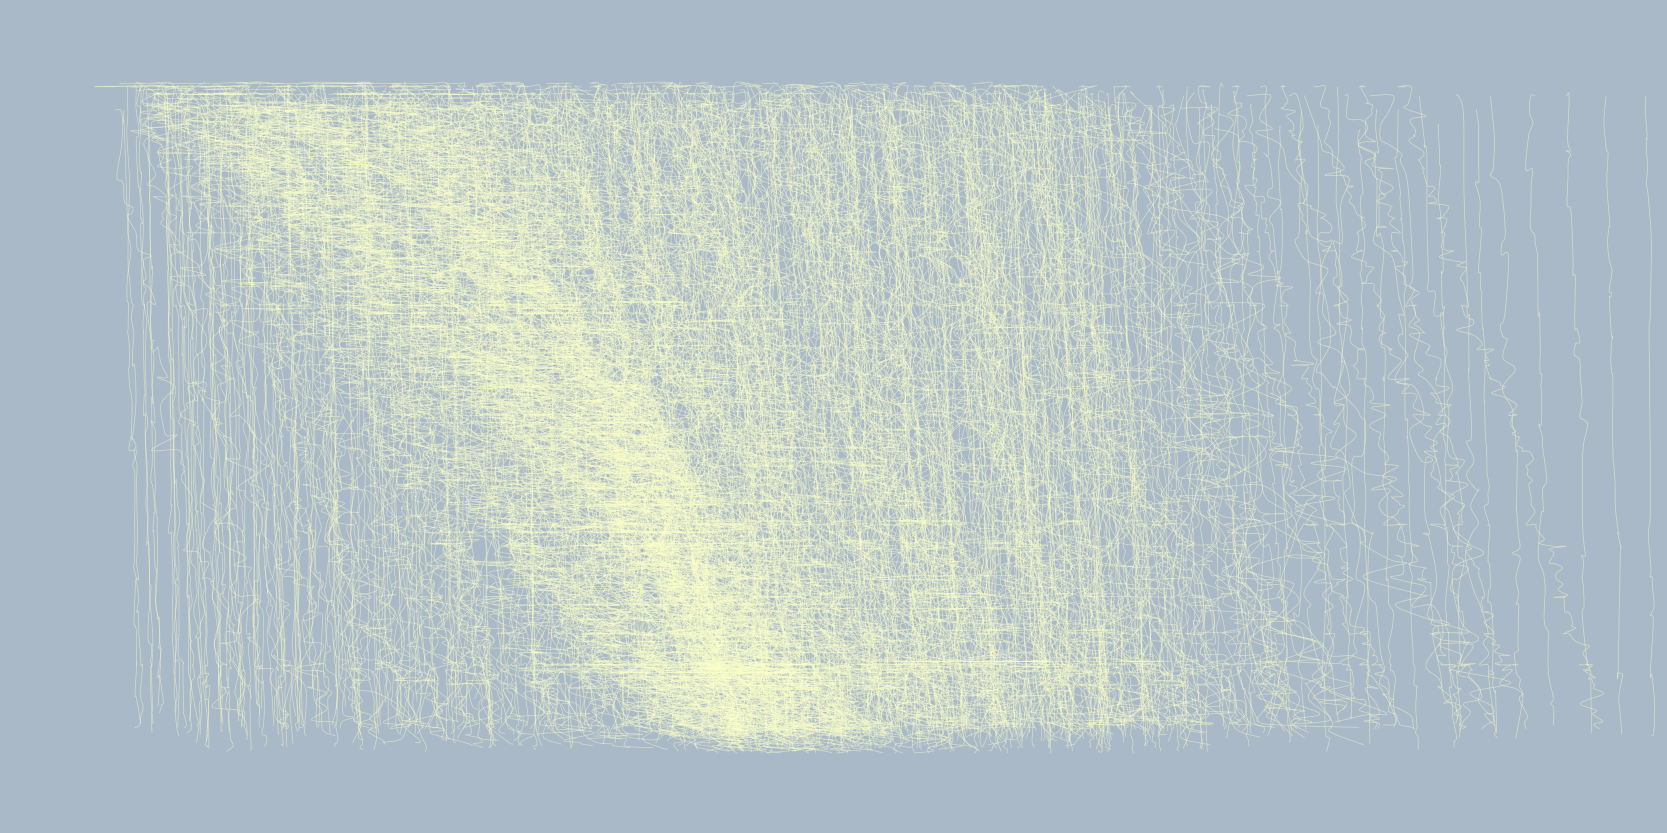

In [36]:
from py5canvas import *
import random
import numpy as np

create_canvas(1667, 833)

background(170,185,200)
fill(250,255,200,125)
stroke(250,255,200,125)
stroke_weight(0.33)

# distance the vertical lines are apart
line_spacing = width/80; 

# initial pen position
x, y = 0, 0

# draws a curve connecting line points (nodes)
def draw_line(x_bias, x_random, sum_lin):
    stroke_weight(0.75)

    no_fill() # stops lines being filled in as a shape

    begin_shape()
    for i in range(len(sum_lin)):
        curve_vertex(x + x_random[i] + x_bias[i], sum_lin[i] + y_offset) # add together node position randomisations
    end_shape()

# [8,10,11,12,15], 15:12:11:10:8 polyrhythm
# alt extended values: [24,27,30,33,36,40,45], from heptatonic cluster ratios, scale: 1 2 3 ^4 5 6 7
polyrhythm_nodes = [24,27,30,33,36,40,45]

# initalise empty lists for use in calculate_lines
line_calcs = []
summed_line = []

def calculate_lines(): # todo: possibly separate into two functions calc and sum - better modularity
    global line_calcs, summed_line

    # reset global variables as empty lists
    line_calcs = []
    summed_line = []

    # loop for number of lines in horizontal drawing area
    for lin in range(int((width*0.33)/line_spacing)):
        summed_line.append([]) # create new nested array for each line
        
        # calculate y values for each component pulse in the polyrhythm 
        for i in range(len(polyrhythm_nodes)):
            calc_y = height * 0.1
            line_calcs.append([])
            for j in range(polyrhythm_nodes[i]):
                line_calcs[i].append(calc_y)
                calc_y += ((height*0.8)-10)/polyrhythm_nodes[i]
                # print(calc_y)

        # sum calculated line nodes
        for i in range(len(polyrhythm_nodes)): # loop for number of nodes
            for j in range(polyrhythm_nodes[i]): # loop for specific node number values
            # 1/3 chance that a node is selected for use per component node in polyrhythm - random pattern generation
                node_select = np.random.normal(1.167,1.167) # probability of drawing node - was random.uniform(0,2.33)
                node_chance = micro_node_density(draw_pass,x) + macro_node_density(draw_pass)
                if node_select < node_chance: 
                    summed_line[lin].append(line_calcs[i][j])
            # limit gaussian distributions of probability within range
            if node_select < node_chance: 
                summed_line[lin].append((height*0.8)-5)   

        summed_line[lin].sort() # for readability when printing

macro_pos = 0
micro_pos = []
# determine which pass of the canvas to centre macro dynamic peak on
def dynamic_form(passes): 
    divisions = [0,1,2,3,4,5] # positions along the duration of the score (no. passes) the macro peak can occur

    macro_pos = int((passes/5) * random_choice(divisions)) # which pass to centre gaussian dynamic peak on

    for p in range(passes): # do for each pass
        micro_pos.append(int(((width*0.33)/5) * random.choice(divisions)))

    print(macro_pos, micro_pos)
            
    return [macro_pos, micro_pos] 

# calculate gaussian field centred on determined x position per pass
def gaussian_field(current_pos, centre, range):
    return np.exp(-((current_pos - centre)**2) / (2 * range**2)) 


# -- dynamic variations across all passes of the canvas -- 

def macro_x_variation(draw_pass):
    x_var_loc = 0
    x_var_scale = 0

    centre = macro_pos
    sigma = 2
    gaussian_weight = gaussian_field(draw_pass, centre, sigma)
    
    # prevent lines from becoming totally straight/nodeless by keeping gaussian_weight away from ~0.0
    if gaussian_weight < 0.075:
        gaussian_weight = 0.075

    # randomised x position and proabability
    x_var_loc = abs(gaussian_weight * np.random.normal(3, 2)) # old/alt: 11,6
    x_var_scale = abs(gaussian_weight * np.random.normal(5, 4)) # old/alt: 19,12

    return [x_var_loc, x_var_scale]

def macro_line_drift(draw_pass):
    x_bias_loc = 0
    x_bias_scale = 0

    dec_line_spacing = 0

    centre = macro_pos
    sigma = 2
    gaussian_weight = gaussian_field(draw_pass, centre, sigma)
    
    if gaussian_weight < 0.075:
        gaussian_weight = 0.075

    x_bias_loc = abs(gaussian_weight * np.random.normal(1.5, 1)) 
    x_bias_scale = abs(gaussian_weight * np.random.normal(2, 1)) 

    # dynamically decrease line_spacing along with increased drift
    dec_line_spacing = abs(gaussian_weight * np.random.normal(5.5, 2)) # at highest dynamics, no. to detract from line_spacing

    return [x_bias_loc, x_bias_scale, dec_line_spacing]

def macro_node_density(draw_pass):
    node_density = 0.0

    centre = macro_pos
    sigma = 2 # width of gaussian bell curve applied to passes of canvas (effect either side of centre pass)
    gaussian_weight = gaussian_field(draw_pass, centre, sigma)
    # print(gaussian_weight)
    
    if gaussian_weight < 0.075:
        gaussian_weight = 0.075

    node_density = abs(gaussian_weight * np.random.normal(0.5,0.33)) # old/alt: 0.5,0.33

    return node_density


#  -- dynamic variations per individual pass of the canvas --

def micro_x_variation(draw_pass, current_x):
    x_var_loc = 7
    x_var_scale = 12

    centre = micro_pos[draw_pass - 1]
    sigma = (width*0.33)/5 # gaussian application of dynamics either side of centre x value per pass
    gaussian_weight = gaussian_field(current_x, centre, sigma)

    if gaussian_weight < 0.05:
        gaussian_weight = 0.05

    x_var_loc = abs(gaussian_weight * np.random.normal(7,5)) # old/alt: 13,10
    x_var_scale = abs(gaussian_weight * np.random.normal(9,7)) # old/alt: 19,15

    return [x_var_loc, x_var_scale]

def micro_line_drift(draw_pass, current_x):
    x_bias_loc = 0.75
    x_bias_scale = 1.5

    dec_line_spacing = 0

    centre = micro_pos[draw_pass - 1]
    sigma = (width*0.33)/5
    gaussian_weight = gaussian_field(current_x, centre, sigma)

    if gaussian_weight < 0.05:
        gaussian_weight = 0.05

    x_bias_loc = abs(gaussian_weight * np.random.normal(2,4))
    x_bias_scale = abs(gaussian_weight * np.random.normal(4,3))

    dec_line_spacing = abs(gaussian_weight * np.random.normal(5.5, 2))

    return [x_bias_loc, x_bias_scale, dec_line_spacing]

def micro_node_density(draw_pass, current_x):
    node_density = 1.0
        
    centre = micro_pos[draw_pass - 1]
    sigma = (width*0.33)/5
    gaussian_weight = gaussian_field(current_x, centre, sigma)

    if gaussian_weight < 0.05:
        gaussian_weight = 0.05
    
    node_density = abs(gaussian_weight * np.random.normal(1.5, 0.5)) # old/alt: 1.5, 0.5

    return node_density


y_offset = 0
# draw polyrhythm nodes to connect lines between
def draw_nodes(): # todo: refactor into smaller functions?
    global x, line_spacing

    # # initialise colours
    # r_val = 255
    # g_val = 255
    # b_val = 200
    # alpha_val = 125

    # loop for number of lines in horizontal drawing space
    for lin in range(int((width*0.33)/line_spacing)):
        # line-node variation
        x_random = []

        # line-node drift
        x_bias = []
        bias_random = 0 
        micro_bias_space = micro_line_drift(draw_pass,x)[2]

        line_spacing = int(width/80 - micro_bias_space) 

        for i in range(len(summed_line[lin])): # draw by determined nodes 
            #stroke(r_val, g_val, b_val, alpha_val) # change stroke colour

            # apply dynamics
            x_var_loc = micro_x_variation(draw_pass,x)[0] + macro_x_variation(draw_pass)[0]
            x_var_scale = micro_x_variation(draw_pass,x)[1] + macro_x_variation(draw_pass)[1]

            x_bias_loc = micro_line_drift(draw_pass,x)[0] + macro_line_drift(draw_pass)[0]
            x_bias_scale = micro_line_drift(draw_pass,x)[1] + macro_line_drift(draw_pass)[1]
            # todo: make more efficient by only calling functions once? 

            x_random.append(np.random.normal(x_var_loc, x_var_scale)) 
            # generate randomised x vals, store in list

            bias_random += np.random.normal(x_bias_loc, x_bias_scale)
            x_bias.append(x + bias_random) 
            # lines trajectory gain skew towards to the right as line progressses
            
            stroke_weight(1)
            
            # # change colours & draw circles
            # fill(r_val, g_val, b_val, alpha_val)
            # circle(x + x_random[i] + x_bias[i], summed_line[lin][i] + y_offset, np.random.normal(1,0.5))
            # r_val -= 0.0001
            # g_val -= 0.0001
            # b_val += 0.008
            # alpha_val -= 0.01
            # print(r_val, g_val, b_val, alpha_val)

        # call line function
        draw_line(x_bias, x_random, summed_line[lin])
        # store all x values for a line to be called at once in the draw_line() loop per line

        # move line to the right
        x += line_spacing


# initialise passes of canvas
num_passes = 31
draw_pass = 0
# manage number of passes and line offsets, call functions to draw each pass
def draw_passes():
    global x, y_offset, draw_pass, alpha_val

    x_init = width * 0.033
    x_offset = 0

    x = x_init

    dynamic_form(num_passes)
    
    while draw_pass < num_passes: # higher than division of ~line_spacing to cause overlap
        # call functions to calculate and draw lines and nodes
        calculate_lines()
        draw_nodes()

        # alpha_val -= 5 # alter alpha value per pass
        # save(f'images/per_pass_score/current_generation_{draw_pass}.png') # save image for each pass
        
        draw_pass += 1
        x_offset += (line_spacing*1.104)/13 # adding interesting displacement in line overlap
        y_offset += random.uniform(-1, 3) # old/alt: np.random.normal(1,2)
        x = x_init + x_offset

        # print(f"pass made {draw_pass}") # print draw pass number

# save('images/current_generation.png') # save image of whole generation
    
draw_passes()

show()

# todo: dynamics skewed towards line density in the first 1/2 to 2/3 of draw area - possibly spread more evenly

--- 

## Reflection & Further Development

A major limitation of the code is inefficiency - it runs incredibly slowly. The current version taking approximately ten seconds to generate its output on my machine.
While this is acceptable for its current use, it is not ideal, especially for future developments. Currently versions are to be generated for use via drawing machine or as a complete whole, before being interpreted by a performer. However future developments may be hindered by this inefficiency. Anything involving live interpretation could be interrupted, such as animating the drawing process or communicating data to another programme - e.g. SuperCollider via Open Sound Control (OSC).

Despite this shortcoming, the result is otherwise pleasing. I, personally, think the aesthetics of the score, process of generation, final output of lines and adjustability of values to produce varied outputs<sup>13</sup>, all live up to the original concept and vision for the piece. I believe within its intended use case, the outcome is fully effective and implementable as a graphic score for musical interpretation with or without instructions provided.
These, however, are my thoughts as the artist self-assessing the work. Testing the score's effectiveness in practice and reviewing by others from varied artistic, musical and computational backgrounds, will provide the most accurate feedback and assessment.

Beyond its current state, I would like to develop it further. Possible developments include animation of the drawing process, use of OSC and SuperCollider to generate sound from score derived data, and extension of line dimensions into three (3D) or four (4D) spacial dimensions projected onto the 2D canvas, via introduction of Z and W axes.
These ideas provide possibilities to adapt the sound generation and performance into new, more varied contexts. As well as to introduce new textures and possibilities visually through rotating in and projecting down from higher spacial dimensions. New spacial possibilities enabling for development into installations, beyond the limitations of 2D drawing.
Some other much needed practical changes would be: improvement to the efficiency and speed of the code, as well as quality of life changes, such as GUI or alternatives to easily tweak values in the generation processes, rather than directly in the code.
  
---

## References

1. All the Lovers in the Night, Mieko Kawakami - page 147
- "In my chair, I surrendered myself to a world of sound that could only be described as sparkling. It made my head sway, and my breath grew deeper as my legs climbed up that evanescent staircase, each step a sheet of light. They would shimmer to life the second my sole made contact, then fizzle into stardust when I lifted my foot, only to be reborn as yet another step, gently showing me the way. That slowly winding spiral stairway of light ascended freely through the dark, and though I was unsure where it was taking me, or what I would find when I arrived, as long as the music was playing, I knew that there was nothing to fear, that I could go anywhere at all." 
<br>

2. wolncuonþærelyfte
- SoundCloud source for audio: https://soundcloud.com/alfthrith/wolcnuonaerelyfte
- A piece for MIDI or player piano, using chance operations applied to poems as the process of geneneration.
- "wolncu on þære lyfte" means "clouds in the sky" in approximated Old English. 
<br>

3. ICA Creatives Sound
- SoundCloud source for full performance audio: https://soundcloud.com/user-121900864/ica-institute-9 
<br>

4. love's song
- SoundCloud source for audio: https://soundcloud.com/alfthrith/lavs-song-20240711
- For score: See Appendix 1 - love's song Score. 
<br>

5. Fontana Mix, John Cage, 1958, version by youtube user Beethoven Was Wrong.
- Youtube source for audio: https://www.youtube.com/watch?v=3_2lF-gGAS0 
<br>

6. Treatise, Cornelius Cardew, 1967, performed by Kymatic Ensemble.
- Youtube source for score and audio: https://www.youtube.com/watch?v=b0V9_xqaw8Q 
<br>

7. Music of Changes, John Cage
- Information about the piece: https://en.wikipedia.org/wiki/Music_of_Changes
- Youtube source for audio: https://www.youtube.com/watch?v=B_8-B2rNw7s
<br>

8. wind departure, summer tour 2002, sawako, 2011
- Bandcamp source for audio: https://sawako.bandcamp.com/track/wind-departure 
<br>

9. Journey In Satchidananda, Alice Coltrane, 1971
- Youtube source for audio: https://www.youtube.com/watch?v=TQtEFdyhgdE
- Chords, glissandi and textures of harp playing from 03:12. 
<br>

10. In A Silent Way, Miles Davis, 1969
- Youtube source for audio: https://www.youtube.com/watch?v=YHesqaMhh34&t=54s
- In A Silent Way starting from 18:18.
- Open texture, static harmony and improvisational touches alongside the head of the piece. 
<br>

11. See Appendix 2 - Generative Drawing, Line Tracing Lab Task. 
<br>

12. See Appendices 3, 4 & 5 - Original Development Notebook, Later Development Notebook & Image Documentation of Development. 
<br>

13. See Appendix 5 - Image Documentation of Development. 
<br>

## Appendicies

Appendix 1 - love's song Score
- https://github.com/ybrow001/generative_graphic_score/tree/master/appendicies/loves_song
- A PDF file of the score.
<br>

Appendix 2 - Generative Drawing, Line Tracing Lab Task
- https://github.com/ybrow001/generative_graphic_score/tree/master/appendicies/line_tracing_lab
- The original lab sketchbook and completed line tracing code.
<br>

Appendix 3 - Original Development Notebook
- https://github.com/ybrow001/generative_graphic_score/blob/master/development_process/graphic_score_dev.ipynb
- The primary ideation and development notebook.
<br>

Appendix 4 - Later Development Notebook
- https://github.com/ybrow001/generative_graphic_score/blob/master/development_process/graphic_score_081125.ipynb
- The notebook for later development stages.
<br>

Appendix 5 - Image Documentation of Development 
- https://github.com/ybrow001/generative_graphic_score/tree/master/images
- Images documenting developments and variations throughout the creation process.